In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install matplotlib seaborn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import warnings
warnings.simplefilter("ignore")

In [6]:
df = pd.read_csv('train.csv')

In [7]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [8]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [9]:
df.shape

(29020, 19)

In [10]:
#### Dropping Booking ID as it is very unique

In [11]:
df.drop(columns=["Booking_ID"] , inplace=True)

In [12]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(7661)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
data = df.copy()

In [16]:
###### Examine Columns one by one

df["room_type_reserved"].value_counts()

room_type_reserved
Room_Type 1    15375
Room_Type 4     4403
Room_Type 6      758
Room_Type 2      500
Room_Type 5      190
Room_Type 7      129
Room_Type 3        4
Name: count, dtype: int64

In [17]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
            'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
           'arrival_year','arrival_month','arrival_date','lead_time','no_of_previous_cancellations', 
          'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

In [18]:
####### Univariate ########

In [19]:
def num_plot_dist(df, num_features):
        fig, axes = plt.subplots(len(num_features), 2, figsize=(15, len(num_features) * 5))
        if len(num_features) == 1:
            axes = [axes] 
        for i, column in enumerate(num_features):
            sns.histplot(data=df, x=column, ax=axes[i][0], kde=True, palette="Blues")
            axes[i][0].set_title(f'Histogram with KDE for {column}')
            
            sns.boxplot(data=df, x=column, ax=axes[i][1], palette="Blues")
            axes[i][1].set_title(f'Box Plot for {column}')
        
        plt.tight_layout()
        plt.show()

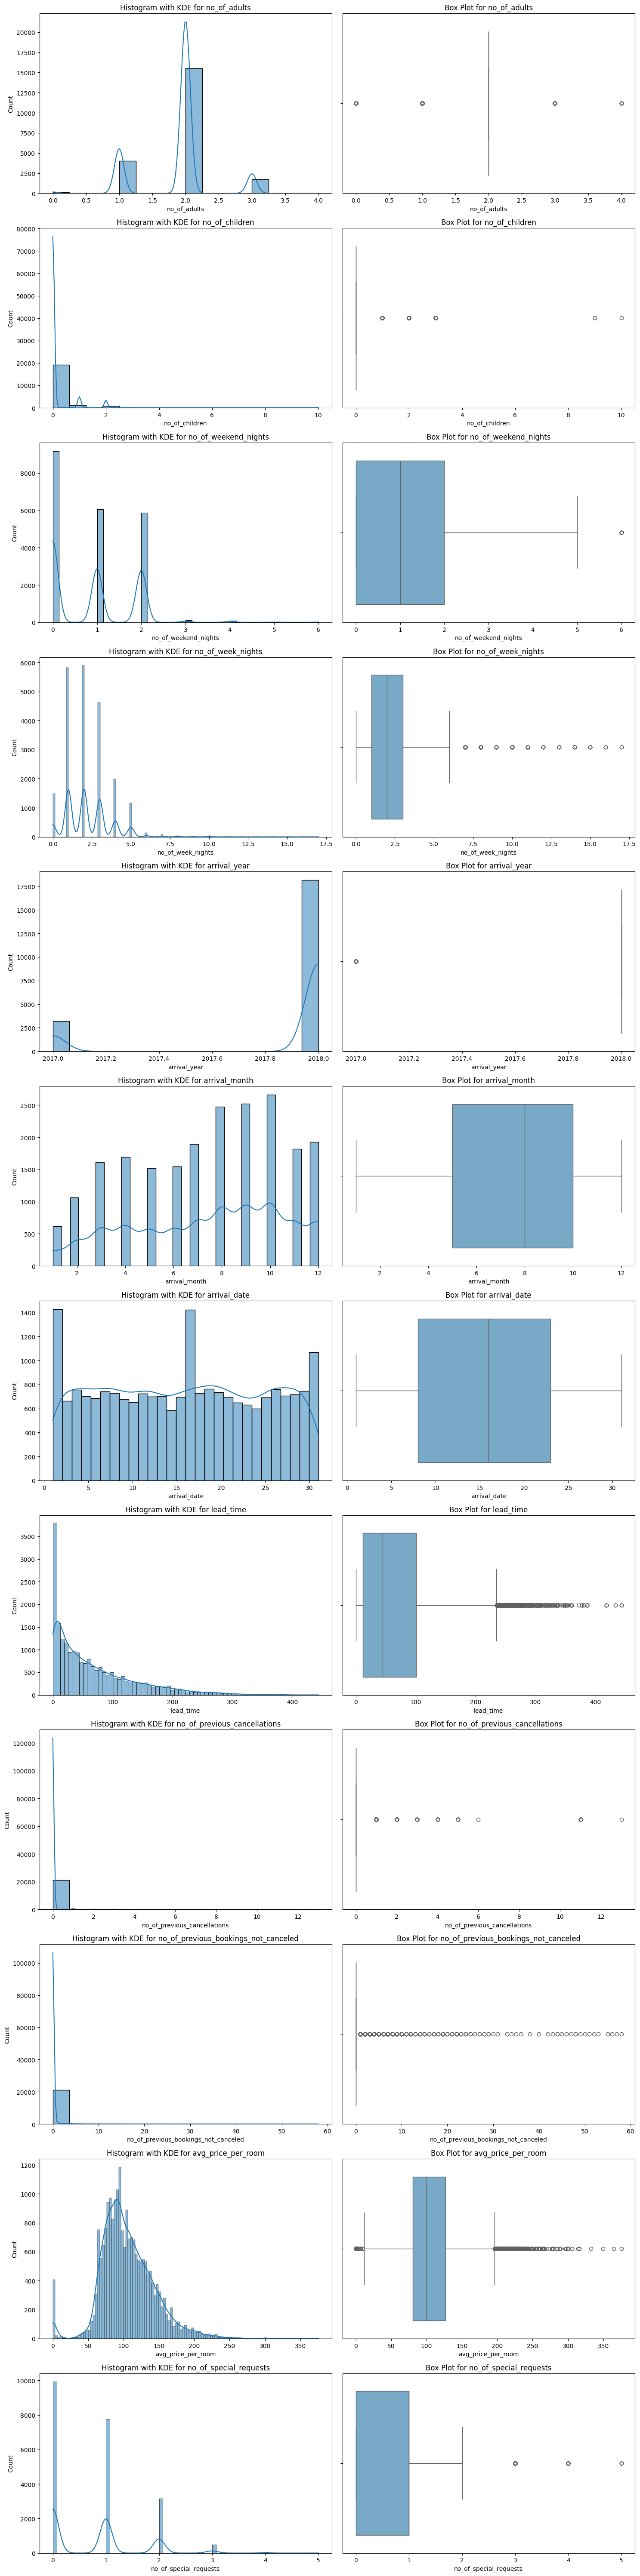

In [20]:
num_plot_dist(data, num_cols)

- Observation from Jupyter NB

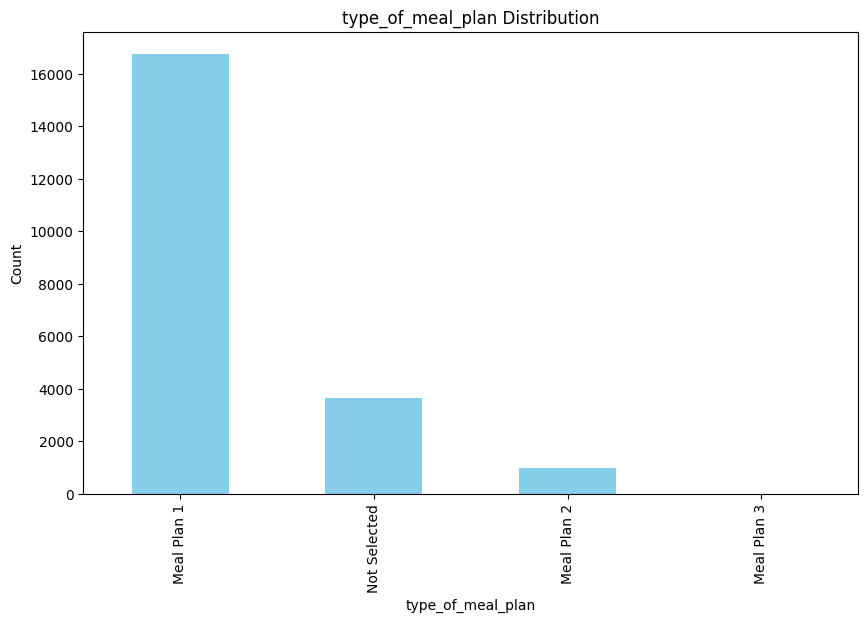

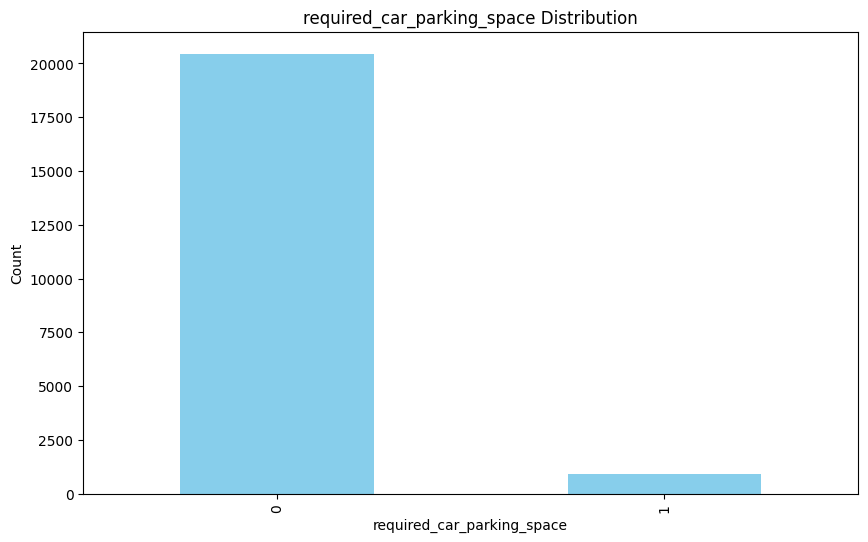

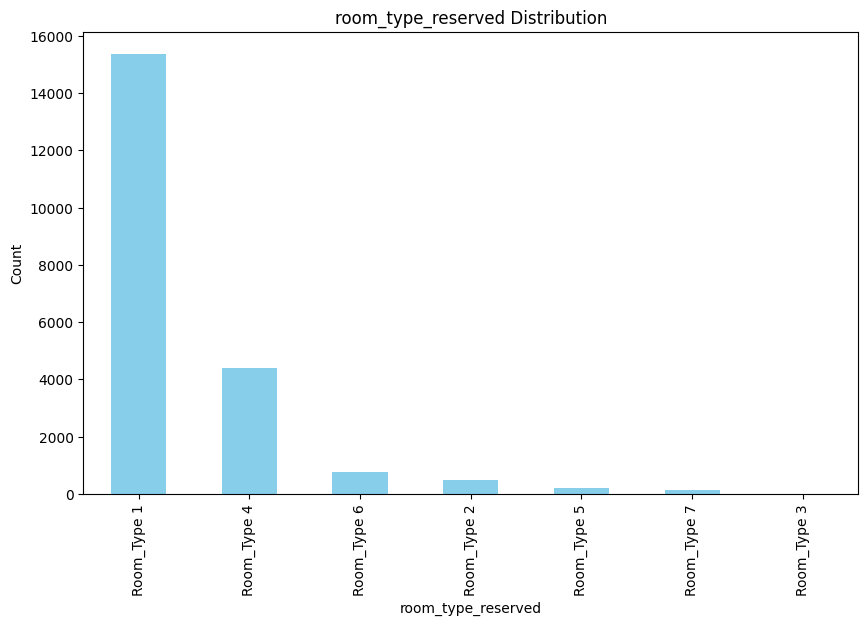

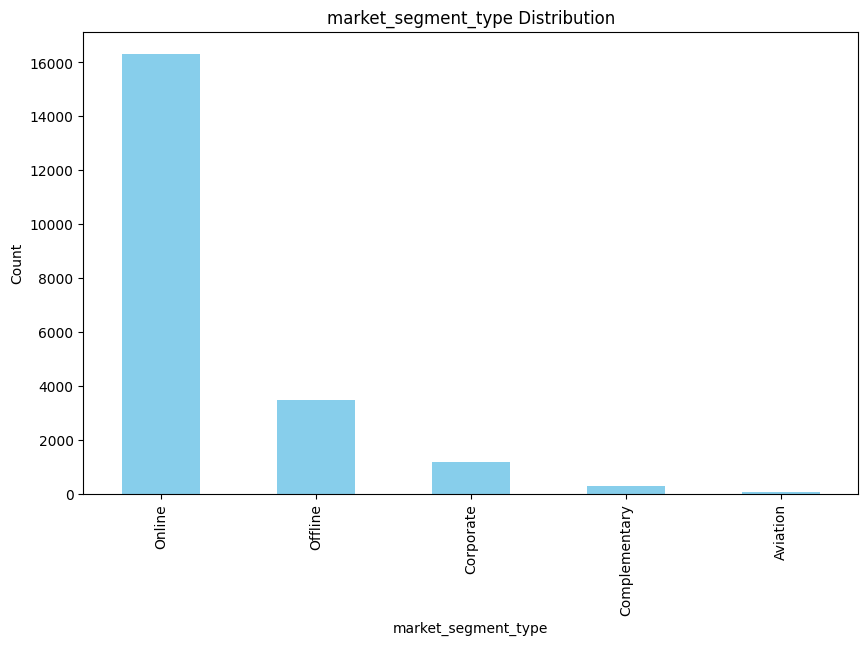

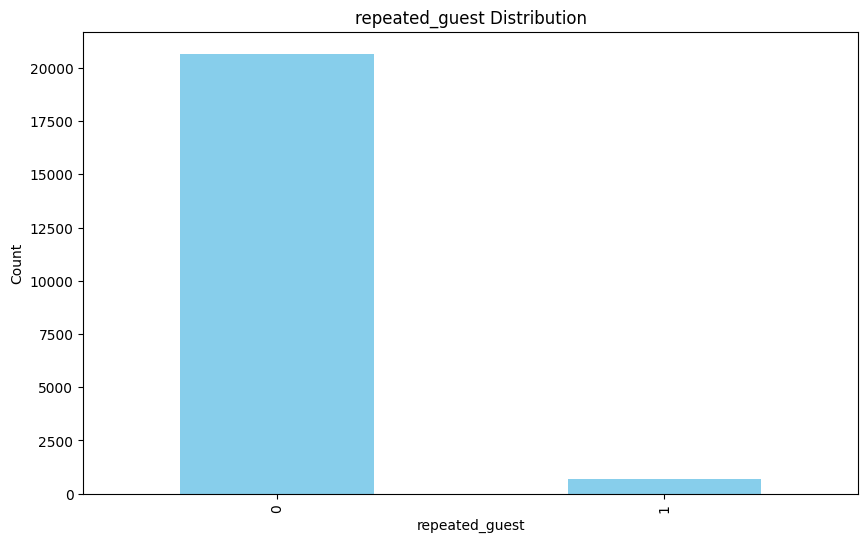

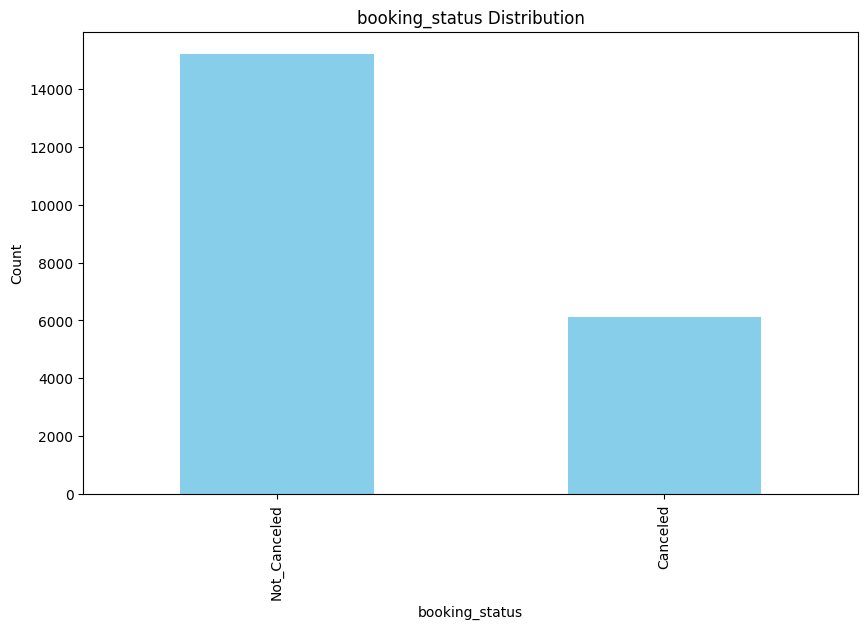

In [21]:
for cat_feature in cat_cols:
        plt.figure(figsize=(10, 6))
        data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'{cat_feature} Distribution')
        plt.xlabel(cat_feature)
        plt.ylabel('Count')
        plt.show()

- We have imbalanced data

In [22]:
#################### Bivaraite ############################

In [23]:
def plot_box_target(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2  
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    
    axes = axes.flatten()
    
    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=df, palette="Blues")
        axes[i].set_title(f'{column} vs {target}')
    
    plt.tight_layout()
    plt.show()

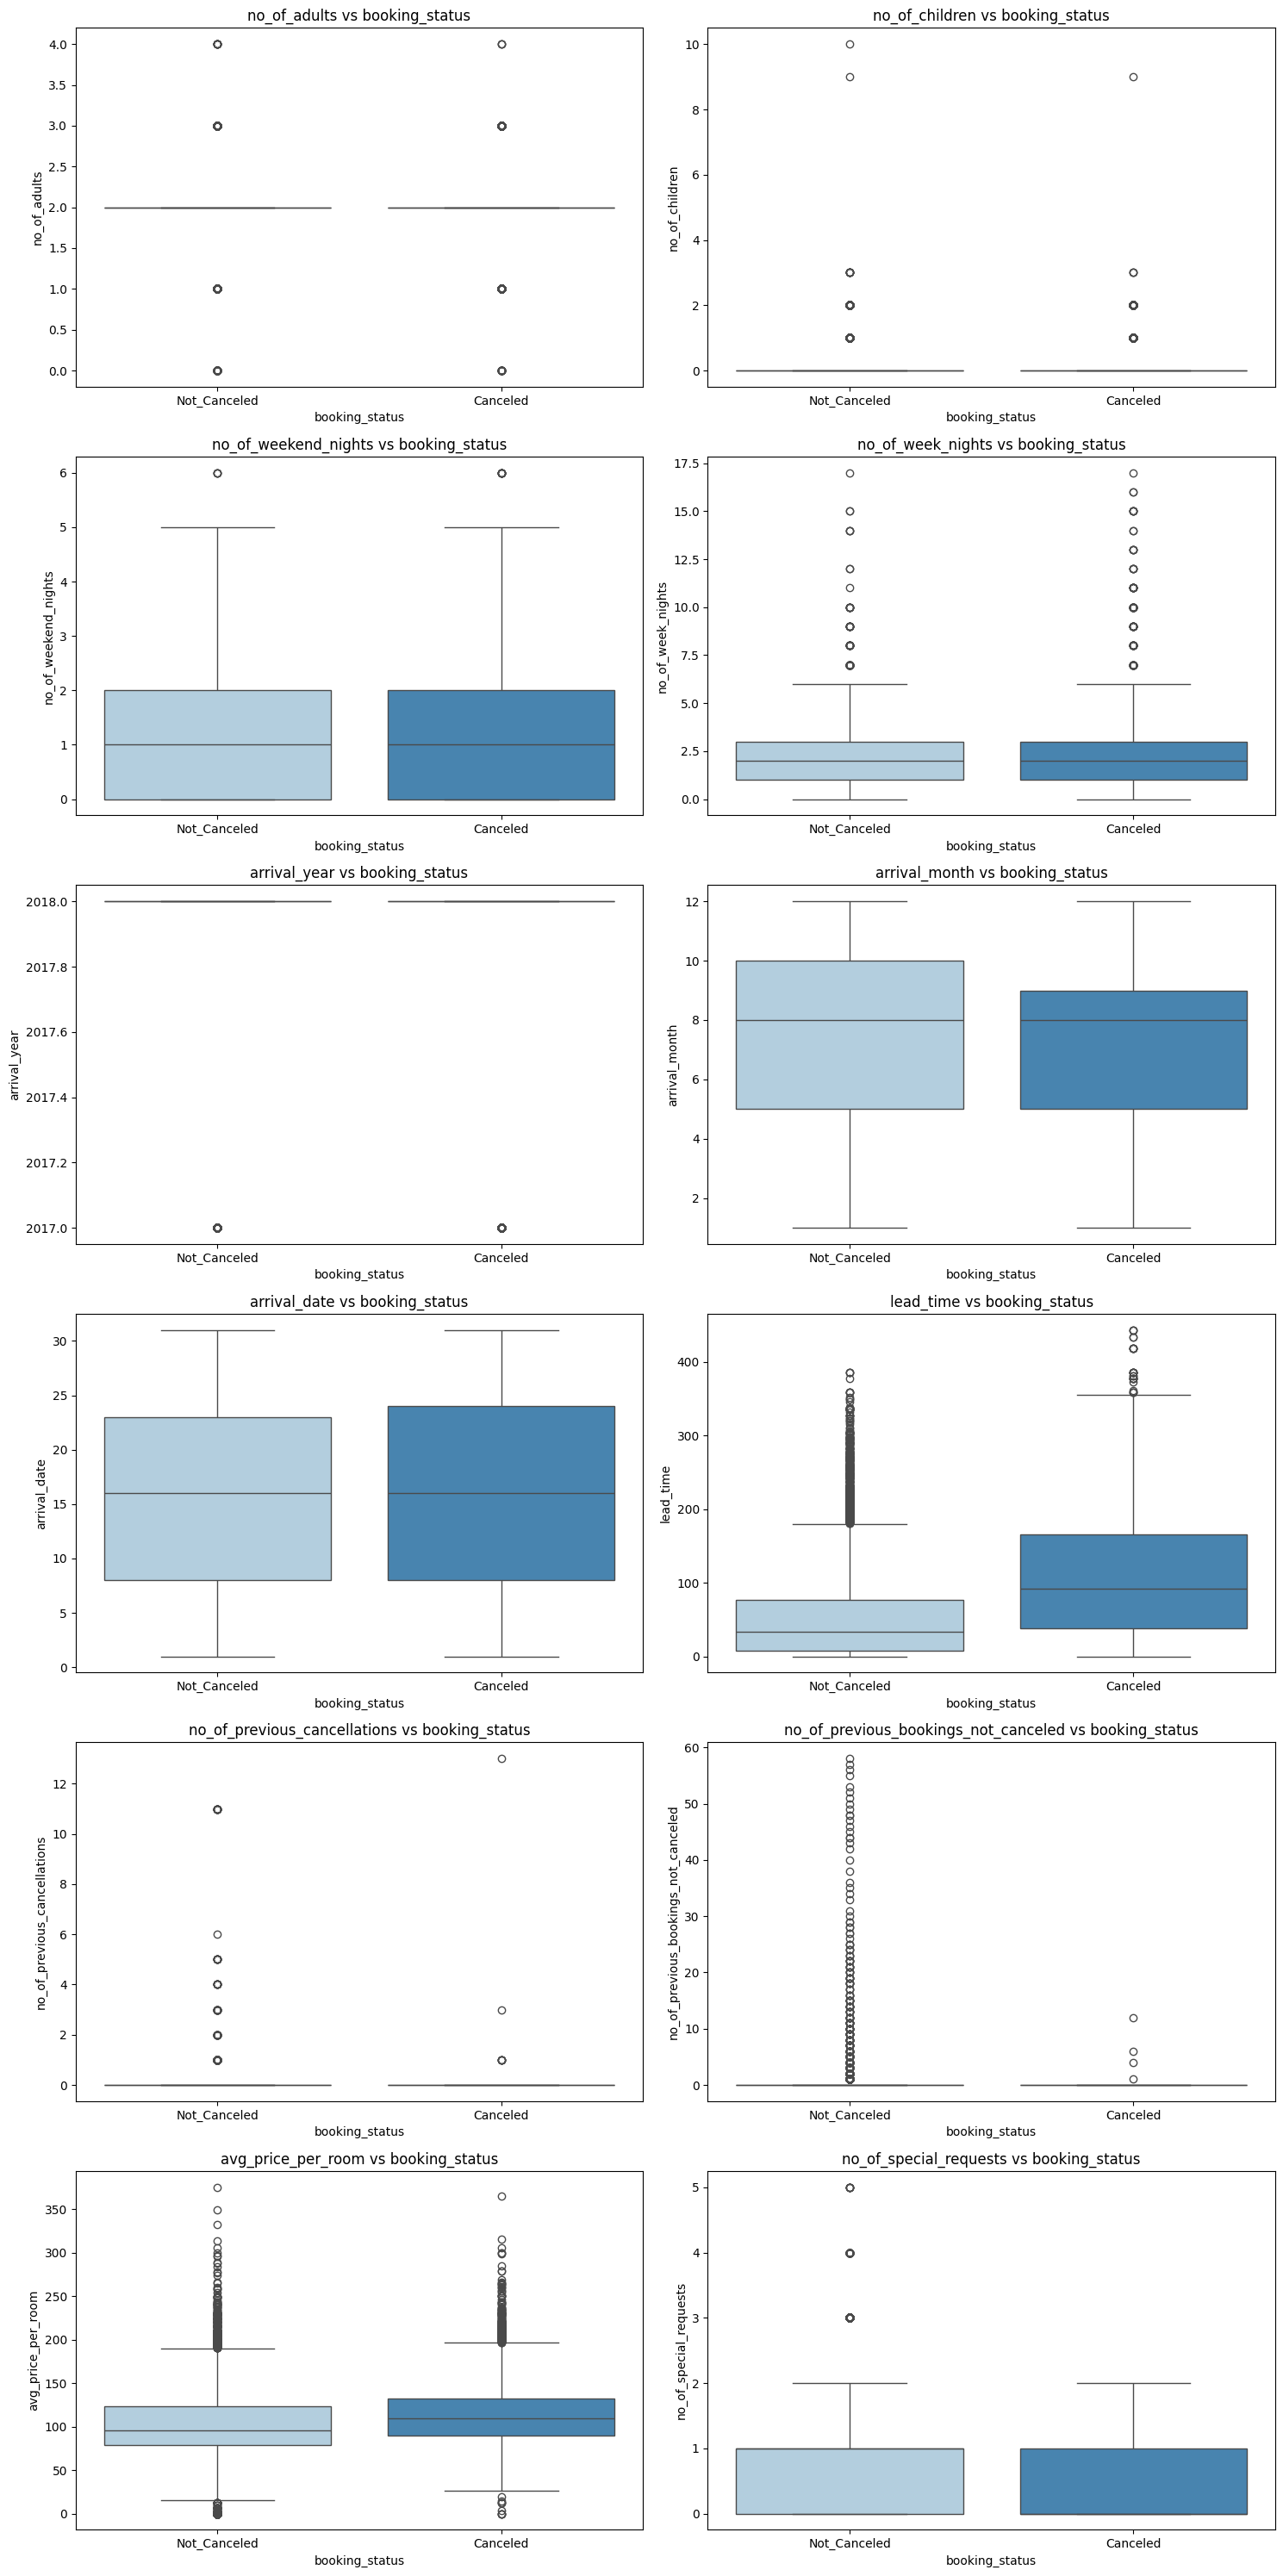

In [24]:
plot_box_target(data, 'booking_status', num_cols)

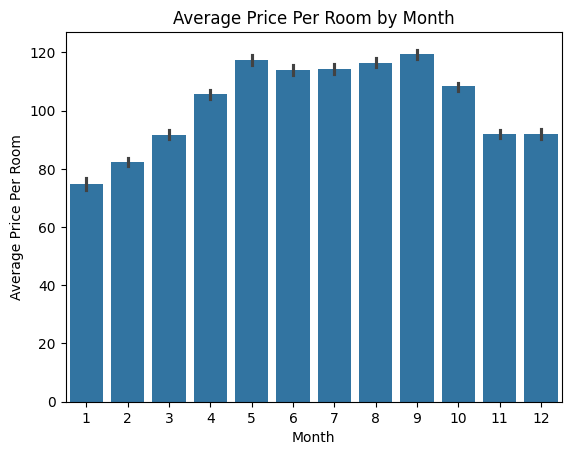

In [25]:
sns.barplot(x='arrival_month', y='avg_price_per_room',data=data)


plt.xlabel('Month')
plt.ylabel('Average Price Per Room')
plt.title('Average Price Per Room by Month')
plt.show()

- Observation in Jupyter NB

In [26]:
def plot_cat_features_with_target(df, target, cat_features):
    num_features = len(cat_features)

    num_row = (num_features + 1) // 2

    fig, axes = plt.subplots(num_row, 2, figsize=(12, num_row * 5))
    
    
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, palette="Set2", ax=axes[i])
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

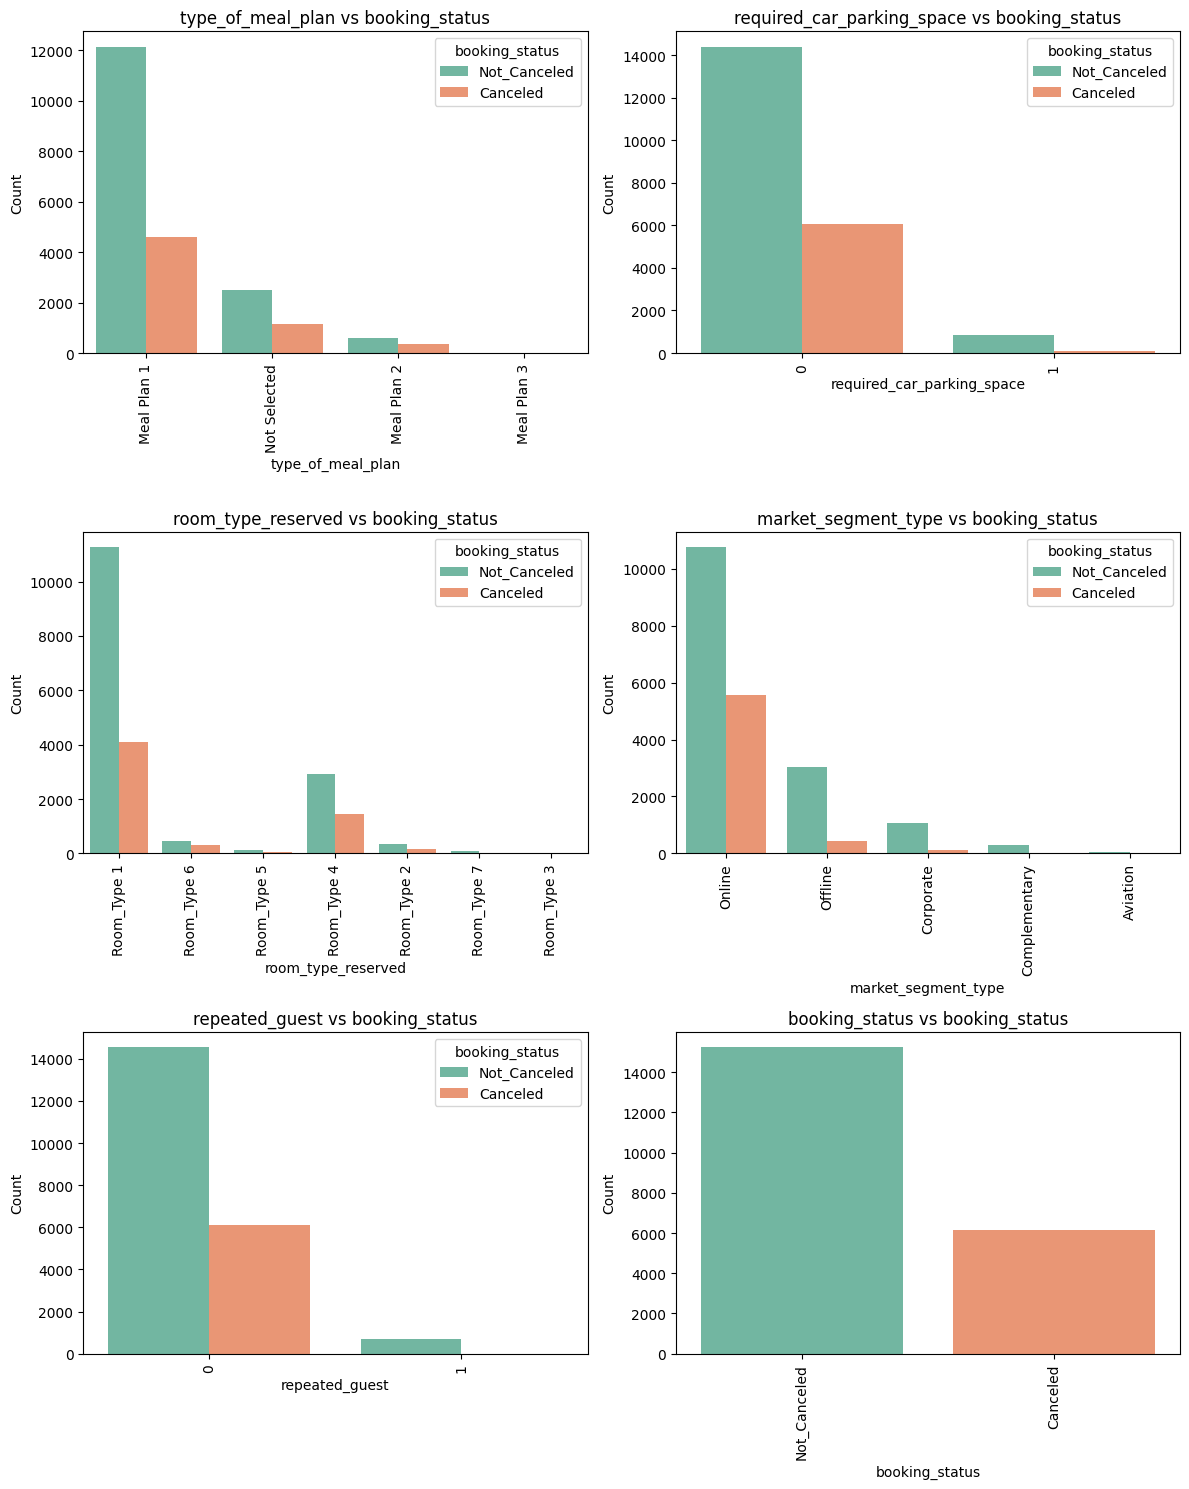

In [27]:
plot_cat_features_with_target(data, 'booking_status', cat_cols)

- Observations in Jupyter NB

In [28]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [29]:
#### Label Encoding
from sklearn.preprocessing import LabelEncoder


In [30]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Dictionary to hold the mappings for each column
mappings = {}

# Perform Label Encoding for each specified column
for col in cat_cols:
    # Fit and transform the column
    df[col] = label_encoder.fit_transform(df[col])
    # Store the mapping for each column in a readable format
    mappings[col] = {label: code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}


print("\nLabel Encoding Mappings:")
for col, mapping in mappings.items():
    print(f"{col}:")
    for label, code in mapping.items():
        print(f"  {label}: {code}")


Label Encoding Mappings:
type_of_meal_plan:
  Meal Plan 1: 0
  Meal Plan 2: 1
  Meal Plan 3: 2
  Not Selected: 3
required_car_parking_space:
  0: 0
  1: 1
room_type_reserved:
  Room_Type 1: 0
  Room_Type 2: 1
  Room_Type 3: 2
  Room_Type 4: 3
  Room_Type 5: 4
  Room_Type 6: 5
  Room_Type 7: 6
market_segment_type:
  Aviation: 0
  Complementary: 1
  Corporate: 2
  Offline: 3
  Online: 4
repeated_guest:
  0: 0
  1: 1
booking_status:
  Canceled: 0
  Not_Canceled: 1


In [31]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

- all are in number now

In [34]:
!pip install statsmodels

  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
#### Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [36]:
# Adding a constant to the features matrix (for the intercept)
X = add_constant(df)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [37]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


- There is no multicollinearity

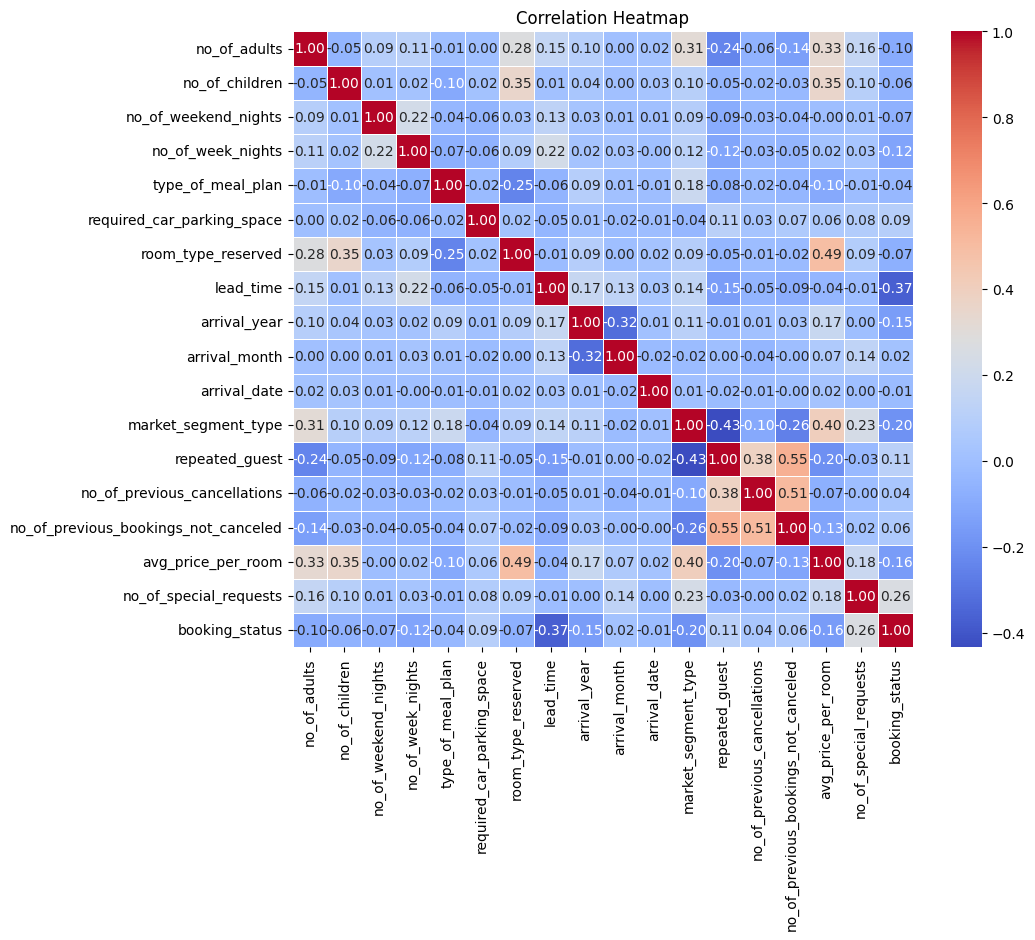

In [38]:
correlation_matrix = df.corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

In [39]:
skewness = df.skew()

# Display the skewness values
print("Skewness of each column:")
print(skewness)

Skewness of each column:
no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64


In [40]:
# Apply log transformation to columns with skewness greater than 5
for column in df.columns:
    if skewness[column] > 5:
        df[column] = np.log1p(df[column])  # log1p applies log(1 + x) to handle zero or negative values

# Calculate skewness after transformation
skewness_after = df.skew()

# Print skewness after transformation
print("\nSkewness after transformation:")
print(skewness_after)


Skewness after transformation:
no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64


In [41]:
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [42]:
####3 Imbalanced data handling

In [43]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [44]:
!pip install imbalanced-learn


  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
print("Class distribution before SMOTE:")
print(y.value_counts())

Class distribution before SMOTE:
booking_status
1    15231
0     6128
Name: count, dtype: int64


In [46]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset (only on the X and y, not the entire DataFrame)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [47]:
# Check the class distribution after applying SMOTE
print("\nClass distribution after SMOTE:")
print(pd.Series(y_res).value_counts())


Class distribution after SMOTE:
booking_status
1    15231
0    15231
Name: count, dtype: int64


In [48]:
# Create a new DataFrame with resampled data
balanced_df = pd.DataFrame(X_res, columns=X.columns)
balanced_df['booking_status'] = y_res


In [49]:
balanced_df["booking_status"].value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [50]:
df = balanced_df.copy()

In [51]:
###### Feature Selection #####

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
X = df.drop(columns=['booking_status'])  # Drop the target column
y = df['booking_status']


In [54]:
model = RandomForestClassifier(random_state=42)

# Fit the model to the data
model.fit(X, y)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to view feature importance in a more readable format
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

In [55]:
feature_importance_df

,feature,importance
7,lead_time,0.261798
16,no_of_special_requests,0.183963
15,avg_price_per_room,0.148957
9,arrival_month,0.087072
10,arrival_date,0.084412
11,market_segment_type,0.056720
3,no_of_week_nights,0.044297
2,no_of_weekend_nights,0.030816
4,type_of_meal_plan,0.019830
6,room_type_reserved,0.019604


In [56]:
top_10_features = feature_importance_df['feature'].head(10).values

# Create a new DataFrame with the top 10 features and target column
top_10_df = df[top_10_features.tolist() + ['booking_status']]


In [57]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [58]:
df = top_10_df.copy()

In [59]:
df.columns

Index(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_month', 'arrival_date', 'market_segment_type',
       'no_of_week_nights', 'no_of_weekend_nights', 'type_of_meal_plan',
       'room_type_reserved', 'booking_status'],
      dtype='object')

In [60]:
!pip install xgboost lightgbm

  Using cached xgboost-2.1.3-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.5.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)
Using cached lightgbm-4.5.0-py3-none-win_amd64.whl (1.4 MB)



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [62]:
X = df.drop(columns=['booking_status'])  # Drop the target column
y = df['booking_status']

In [63]:
# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Initialize dictionaries to store the evaluation metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1 Score': []
}


In [64]:
# Train and evaluate each classifier
for model_name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Make predictions
    y_pred = classifier.predict(X_test)
    
    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store the results
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['F1 Score'].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [65]:
# Convert the metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Show the evaluation results
print(metrics_df)

                       Model  Accuracy    Recall  Precision  F1 Score
0              Random Forest  0.890694  0.887948   0.894357  0.891141
1        Logistic Regression  0.774003  0.728990   0.804168  0.764736
2          Gradient Boosting  0.836698  0.864821   0.820711  0.842189
3  Support Vector Classifier  0.720499  0.706840   0.729902  0.718186
4              Decision Tree  0.834564  0.826384   0.842297  0.834265
5        K-Nearest Neighbors  0.779419  0.674919   0.856907  0.755102
6                Naive Bayes  0.773511  0.728339   0.803738  0.764183
7                    XGBoost  0.874282  0.879479   0.872093  0.875770
8                   AdaBoost  0.805186  0.814332   0.802053  0.808146
9                   LightGBM  0.865419  0.885668   0.852886  0.868968


In [66]:
######## Random Forest #########

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [68]:
X = df.drop(columns=['booking_status'])  # Drop the target column
y = df['booking_status']

In [69]:
# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(100, 500),               # Randomly select between 100 and 500 trees
    'max_depth': randint(10, 50),                     # Randomly select depth between 10 and 50
    'min_samples_split': randint(2, 10),              # Randomly select min samples to split between 2 and 10
    'min_samples_leaf': randint(1, 5),                # Randomly select min samples per leaf between 1 and 5
    'bootstrap': [True, False]                        # Randomly select True or False for bootstrap
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

# Fit RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Output the best parameters
print(f"Best Hyperparameters: {best_params}")

# Evaluate the model on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Output the metrics
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 413}
Accuracy: 0.8936484490398818
Recall: 0.8960912052117264
Precision: 0.8931818181818182
F1 Score: 0.8946341463414634


- Slight increase in accuracy

In [70]:
import joblib

In [71]:
joblib.dump(best_rf_model, "random_forest_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [72]:
loaded_model = joblib.load("random_forest_model.pkl")

In [73]:
X_train[0:2]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0
2559,5,0,110.0,5,24,2,2,0,0,0


In [74]:
y_train[0:2]

4157    1
2559    1
Name: booking_status, dtype: int64

In [75]:
new_data = np.array([
    [2 ,	1,	92.000000,	1,	28,	4,	1,	0,	0,	0],  # Example instance 1
    [40, 0	, 114.251314 ,	3	,17	,4 ,	0,	2	,0	,2]   # Example instance 2
])

In [76]:
predictions = loaded_model.predict(new_data)

In [77]:
predictions

array([1, 0])